In [1]:
import os
os.chdir("../")
os.getcwd()

'/home/Aishu/dl-model-extraction'

In [2]:
from attacker.query import *
from attacker.utils import *
from victim.__init__ import *

set_seed(42)

# Query victim model & Train attacker model

In [5]:
config = {
    "batch_size": 500,
    "learning_rate": 0.008,
    "epochs": 80,
    "query_size":10000,
    "query_type": 'random',
    "victim": { "data": CIFAR_10,  "model_name": RESNET50 },
    "attacker": RESNET34
}

In [4]:
trainloader, testloader, outputs = get_dataloader(config["victim"]["data"])
model = get_model(config["attacker"], outputs)
result = training(model, trainloader, testloader, config["epochs"],
                           optimizer=torch.optim.Adam(model.parameters(), lr=config["learning_rate"]),
                           loss=torch.nn.CrossEntropyLoss())

Files already downloaded and verified
Files already downloaded and verified
epoch 1
    - train_acc 0.22752 train_loss 1.87244
    - test_acc  0.29960 test_loss  2.07310
epoch 2
    - train_acc 0.33908 train_loss 1.83579
    - test_acc  0.31730 test_loss  5.97183
epoch 3
    - train_acc 0.41780 train_loss 1.49179
    - test_acc  0.35300 test_loss  2.22720
epoch 4
    - train_acc 0.47046 train_loss 1.38746
    - test_acc  0.47650 test_loss  1.43808
epoch 5
    - train_acc 0.53822 train_loss 1.17589
    - test_acc  0.53410 test_loss  1.34388
epoch 6
    - train_acc 0.49670 train_loss 1.24104
    - test_acc  0.55030 test_loss  1.32284
epoch 7
    - train_acc 0.59548 train_loss 1.15196
    - test_acc  0.56860 test_loss  1.26630
epoch 8
 3500 ...

KeyboardInterrupt: 

Files already downloaded and verified
Files already downloaded and verified
Loading queried cifar_10 dataset with resnet50 victim
    - input:10000 queried:10000
Sample using None with query size 10000
    - input:10000 sampled:10000
Loading queried cifar_10 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using random with query size 10000
    - input:50000 sampled:10000
epoch 1
    - train_acc 0.15360 train_loss 2.26540
    - test_acc  0.09850 test_loss  910.39594
epoch 2
    - train_acc 0.22450 train_loss 2.02166
    - test_acc  0.15460 test_loss  3.37208
epoch 3
    - train_acc 0.26860 train_loss 2.27981
    - test_acc  0.09610 test_loss  25.74615
epoch 4
    - train_acc 0.21220 train_loss 2.17508
    - test_acc  0.13860 test_loss  3.60532
epoch 5
    - train_acc 0.29200 train_loss 1.87941
    - test_acc  0.31200 test_loss  2.21972
epoch 6
    - train_acc 0.32650 train_loss 2.14915
    - test_acc  0.33550 test_loss  2.43680
epoch 7
    - train_acc 0.35970 train_l

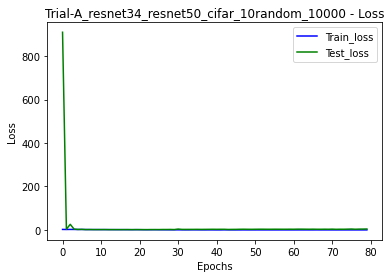

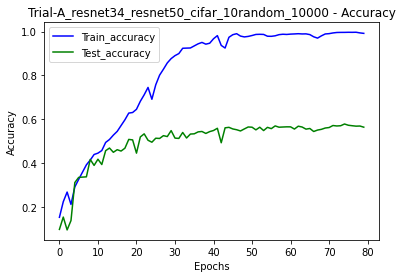

{'Victim': 'resnet50', 'Dataset': 'cifar_10', 'QueryType': 'random', 'QuerySize': 10000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0296, 'Train Accuracy': 99.19, 'Test Loss': 4.2369, 'Test Accuracy': 56.43}


In [6]:
# get dataset in dataloader
trainloader, testloader, outputs = get_dataloader(config["victim"]["data"])

# query & save test data
querytestloader = query_victim(config["victim"], outputs, testloader, len(testloader.dataset), train=False)

# query train data
querytrainloader = query_victim(config["victim"], outputs, trainloader, config["query_size"], q_type=config["query_type"])

# initialize attacker model
attacker = get_model(config["attacker"], outputs)

# train attacker model
attacker_result = training(attacker, querytrainloader, querytestloader, config["epochs"],
                           optimizer=torch.optim.Adam(attacker.parameters(), lr=config["learning_rate"]),
                           loss=torch.nn.CrossEntropyLoss())

# save & visualize model inference
title = f'Trial-A_{config["attacker"]}_{config["victim"]["model_name"]}_{config["victim"]["data"]}{config["query_type"]}_{config["query_size"]}'
percent = save_visualize(attacker, attacker_result,title )
results_dict={"Victim":config["victim"]["model_name"],
                "Dataset":config["victim"]["data"],
                "QueryType": config["query_type"],
                "QuerySize": config["query_size"],
                "Queried Output": 'Labels',
                "Attacker": config["attacker"],
                "Train Loss": percent[0],
                "Train Accuracy": percent[1],
                "Test Loss": percent[2],
                "Test Accuracy": percent[3]}
print(results_dict)

# Parameters

In [ ]:
parameters = {
        "query_size": [10000, 20000, 30000, 40000, 50000],
        "query_type": ['random','coreset'],
        "victim":[{ "data": CIFAR_10, "model_name": RESNET50},
                  {"data": CIFAR_100, "model_name": RESNET50 }],
        "attacker":[RESNET34]
}

# Investigations

In [ ]:
Results = []
# Iterate through Victim Model & Dataset
for victim in parameters["victim"]:
    print('---------------------------------------------------------------------------')
    # get dataset in dataloader
    trainloader, testloader, outputs = getDataset(victim["data"])

    # query test data
    querytestloader = QueryVictim(victim, outputs, testloader, len(testloader.dataset), train=False)

    # Iterate through Attacker Model
    for attacker_type in parameters["attacker"]:
        # Iterate Through Query Type
        for querytype in parameters["query_type"]:
            # Iterate Through Query Size
            for size in parameters["query_size"]:
                print('-----------------------------------------------------------------------------')
                print(f'-----------------------Dataset: {victim["data"]}----------------------------')
                print(f'--------Victim: {victim["model_name"]} Attacker: {attacker_type}------------')
                print(f'---------------Query Type: {querytype} Query Size: {size}-------------------')

                # query train data
                querytrainloader = query_victim(victim, outputs, trainloader, size, q_type=querytype)

                # initialize attacker model
                attacker = get_model(attacker_type, outputs)

                # train attacker model
                attacker_result = training(attacker, querytrainloader, querytestloader, (-1, 3, 32, 32), config["epochs"],
                                           optimizer=torch.optim.Adam(attacker.parameters(), lr=config["learning_rate"]),
                                           loss=torch.nn.CrossEntropyLoss())

                # save & visualize model inference
                title = f'A_{attacker_type}_{victim["model_name"]}_{victim["data"]}_{querytype}_{size}'
                percent = SaveVisualize(attacker, attacker_result, title)
                results_dict={"Victim":victim["model_name"],
                                "Dataset":victim["data"],
                                "QueryType": querytype,
                                "QuerySize": size,
                                "Queried Output": 'Labels',
                                "Attacker": attacker_type,
                                "Train Loss": percent[0],
                                "Train Accuracy": percent[1],
                                "Test Loss": percent[2],
                                "Test Accuracy": percent[3]}

                print(results_dict)
                Results.append(results_dict)
                print('-----------------------------------------------------------------------------')

In [ ]:
Results